In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


## Convolutional autoencoder (adapted from denoising keras example)

### Model construction and training

In [2]:
### network architecture
input_img = Input(shape=(28,28,1))

x = Conv2D(8,(3,3),padding='same', activation='relu')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),padding='same', activation='relu')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

## in order to have the encoder and decoder be callable as seperate models they are first constructed as 
## seperate networks
encoded_input = Input(shape=(7,7,8))
decoder_input = Conv2D(8,(3,3),padding='same', activation='relu')(encoded_input)
x = UpSampling2D((2,2))(decoder_input)
x = Conv2D(8,(3,3),padding='same', activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),padding='same', activation='relu')(x)

encoder = Model(input_img,encoded)
decoder = Model(encoded_input, decoded)

##
full_model = decoder(encoder(input_img))

autoencoder = Model(input_img,full_model)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [3]:
### load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train),28,28,1))
x_test = x_test.reshape((len(x_test),28,28,1))

In [4]:
### train model
autoencoder.fit(x_train,x_train,
               epochs = 100,
               batch_size = 128,
               shuffle = True,
               validation_data = (x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.1826 - val_loss: 0.1403
Epoch 2/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1361 - val_loss: 0.1306
Epoch 3/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1301 - val_loss: 0.1264
Epoch 4/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1263 - val_loss: 0.1226
Epoch 5/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1235 - val_loss: 0.1201
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1214 - val_loss: 0.1183
Epoch 7/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1189 - val_loss: 0.1163
Epoch 8/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1166 - val_loss: 0.1138
Epoch 9/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1146 - val_loss: 0.

60000/60000 [==============================] - 5s 76us/step - loss: 0.0908 - val_loss: 0.0894
Epoch 78/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.0908 - val_loss: 0.0894
Epoch 79/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.0905 - val_loss: 0.0893
Epoch 80/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.0906 - val_loss: 0.0891
Epoch 81/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0906 - val_loss: 0.0894
Epoch 82/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.0903 - val_loss: 0.0892
Epoch 83/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0903 - val_loss: 0.0922
Epoch 84/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.0903 - val_loss: 0.0931
Epoch 85/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.0904 - val_loss: 0.0897
Epoch 86/100
60000/60000 [========================

### Plots of reproduction

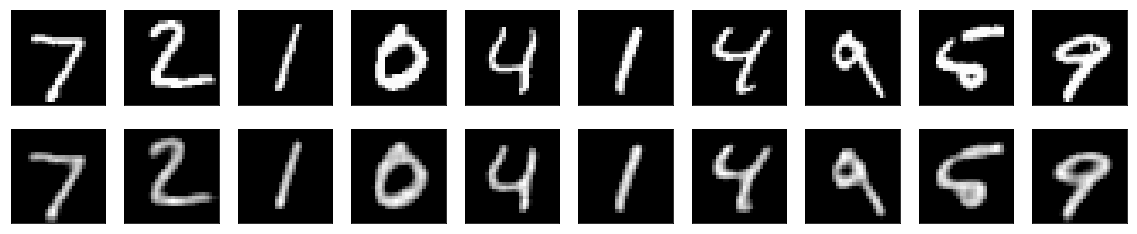

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

### Latent space interpolation plots

In [21]:
%matplotlib inline

<IPython.core.display.Javascript object>


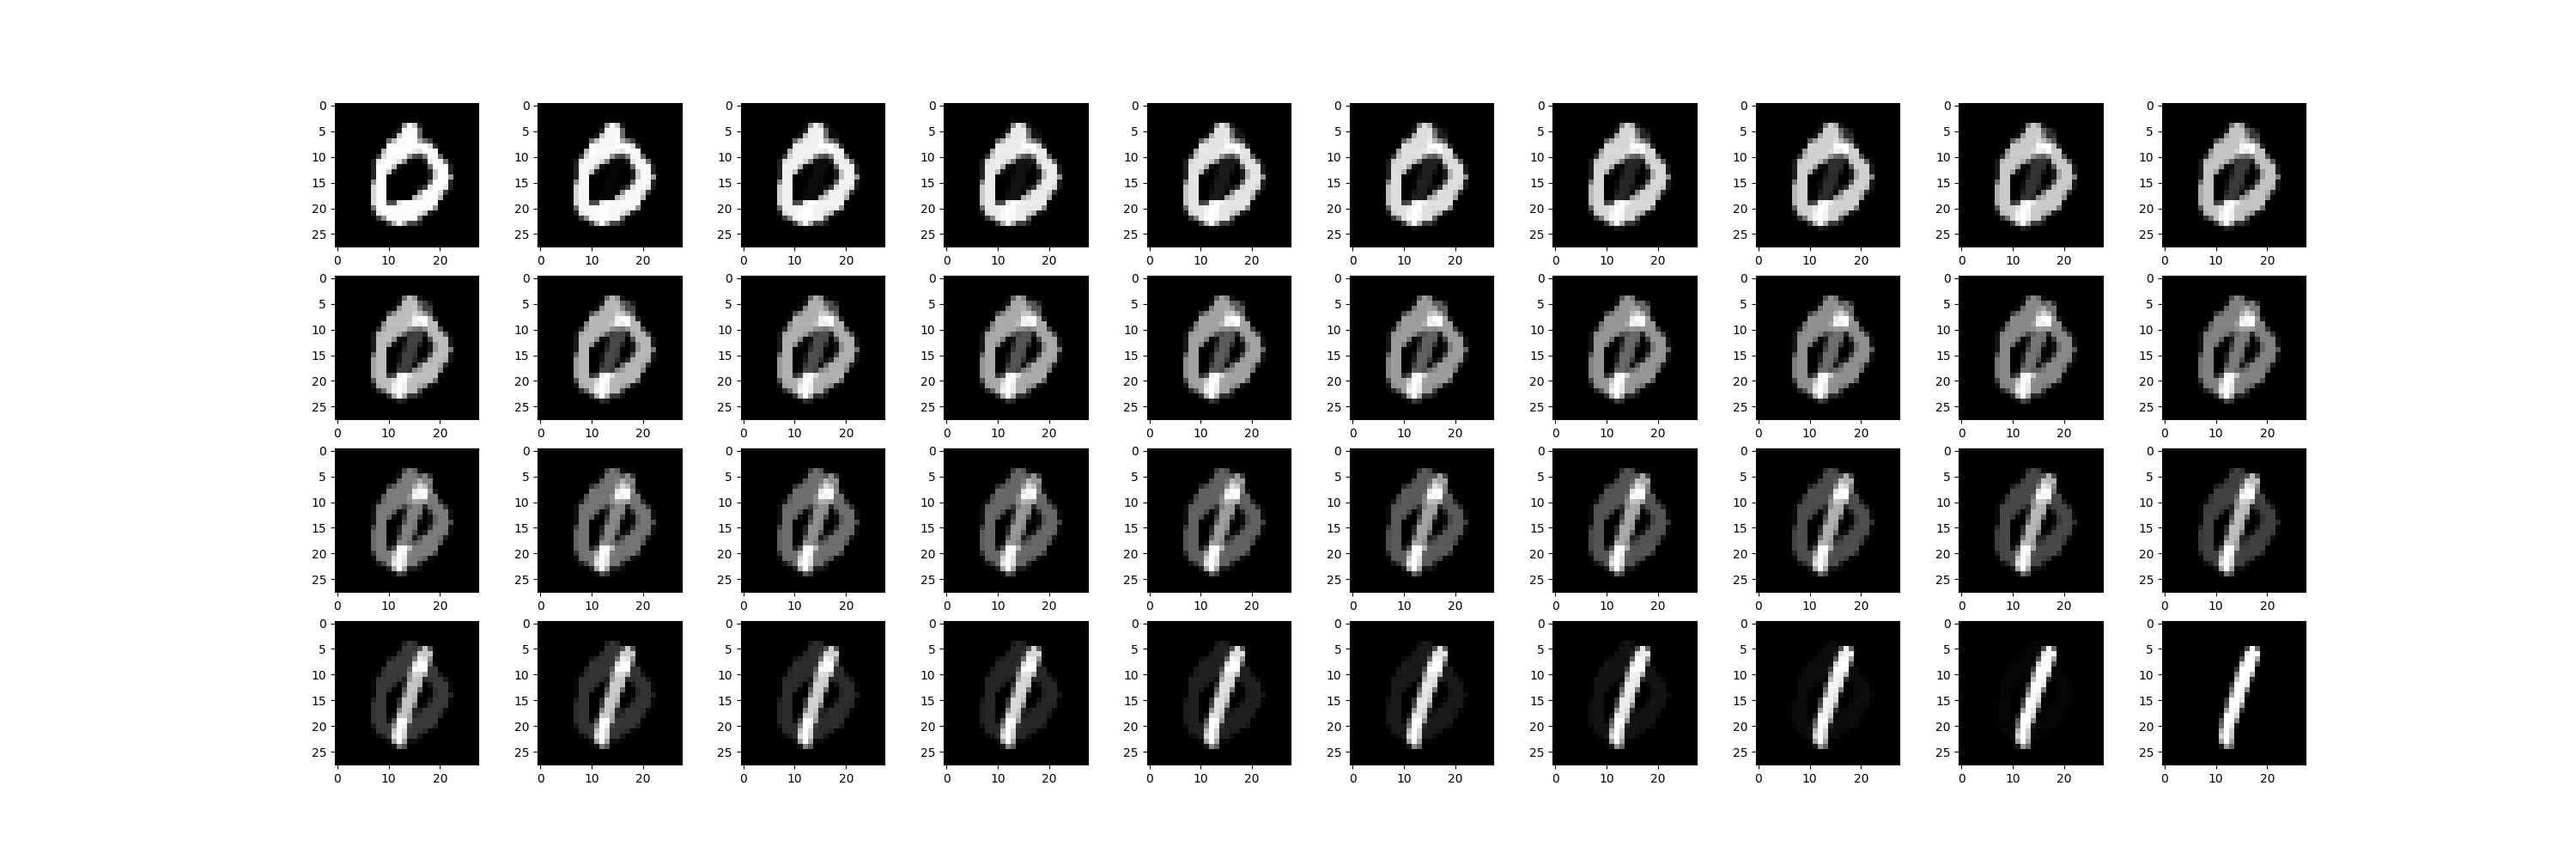

In [20]:
x = x_test[3].reshape(28,28)
y = x_test[5].reshape(28,28)
plt.figure(figsize=(30,10))
T = 40
for i in range(T):
    img = ((T-1-i)*x+i*y)/39
    ax = plt.subplot(4,10,i+1)
    plt.imshow(img)
    plt.gray()
plt.show()

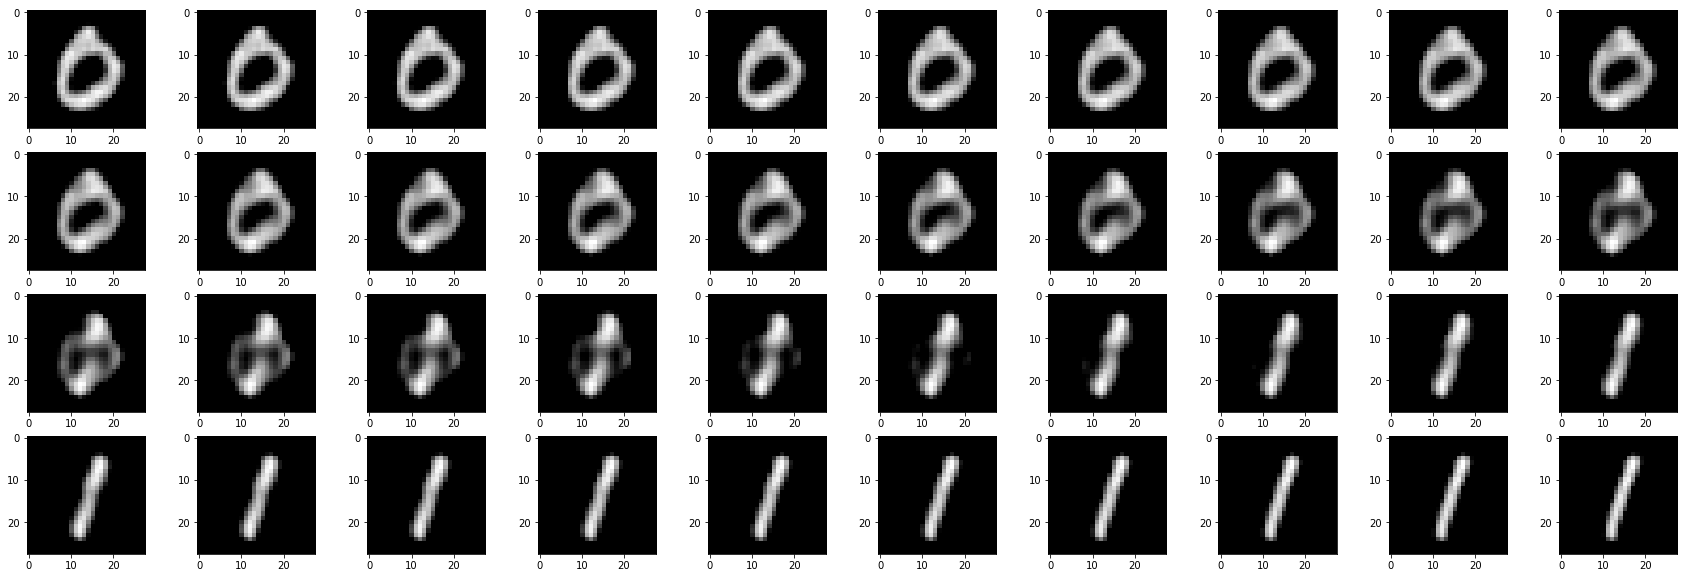

In [8]:
x = encoded_imgs[3]
y = encoded_imgs[5]
plt.figure(figsize=(30,10))
T = 40
for i in range(T):
    enc_img = ((T-1-i)*x+i*y)/39
    img = decoder.predict(enc_img.reshape(1,7,7,8)).reshape(28,28)
    ax = plt.subplot(4,10,i+1)
    plt.imshow(img)
    plt.gray()
plt.show()

# Conv with fully connected layer and less hidden units

## Model

In [9]:
### network architecture
input_img = Input(shape=(28,28,1))

x = Conv2D(8,(3,3),padding='same', activation='relu')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(4,(3,3),padding='same', activation='relu')(x)
x = MaxPooling2D((2,2),padding='same')(x)
encoded = Dense(49)(x)

#encoded = Reshape((7,7,1))(x)

## in order to have the encoder and decoder be callable as seperate models they are first constructed as 
## seperate networks
encoded_input = Input(shape=(7,7,1))
#x = Reshape((7,7,1))(encoded_input)
x = Conv2D(4,(3,3),padding='same', activation='relu')(encoded_input)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),padding='same', activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),padding='same', activation='relu')(x)

encoder = Model(input_img,encoded)
decoder = Model(encoded_input, decoded)

##
full_model = decoder(tf.reshape(encoder(input_img),[7,7,1]))

autoencoder = Model(input_img,full_model)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

IndexError: list index out of range

# Simple AE

In [24]:
input_img = Input(shape=(784,))
encoded = Dense(32)(input_img)
output = Dense(784,)(encoded)

autoencoder = Model(input_img,output)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
encoder = Model(input_img,encoded)

In [12]:
### train model
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
autoencoder.fit(x_train,x_train,
               epochs = 100,
               batch_size = 128,
               shuffle = True,
               validation_data = (x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.4173 - val_loss: 0.2848
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2565 - val_loss: 0.2314
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2185 - val_loss: 0.2064
Epoch 4/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2017 - val_loss: 0.1937
Epoch 5/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1909 - val_loss: 0.1855
Epoch 6/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1828 - val_loss: 0.1772
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1744 - val_loss: 0.1687
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1681 - val_loss: 0.1646
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1574 - val_loss: 0.1

60000/60000 [==============================] - 1s 22us/step - loss: 0.1116 - val_loss: 0.1106
Epoch 78/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1117 - val_loss: 0.1102
Epoch 79/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1115 - val_loss: 0.1102
Epoch 80/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1114 - val_loss: 0.1098
Epoch 81/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1115 - val_loss: 0.1105
Epoch 82/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1114 - val_loss: 0.1105
Epoch 83/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1113 - val_loss: 0.1097
Epoch 84/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1114 - val_loss: 0.1105
Epoch 85/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1113 - val_loss: 0.1103
Epoch 86/100
60000/60000 [========================

# t-SNE

## sklearn implementation

In [13]:
from sklearn.manifold import TSNE

### 2D with default parameters

In [14]:
X = encoder.predict(x_test.reshape(10000,784))
X_tsne = TSNE().fit_transform(X)

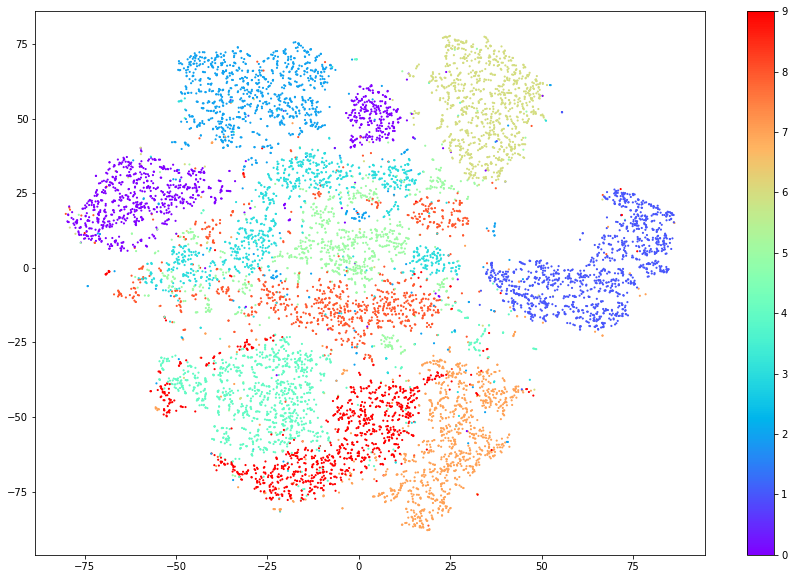

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_test,cmap='rainbow',marker='.',s=5)
plt.colorbar()
plt.show()

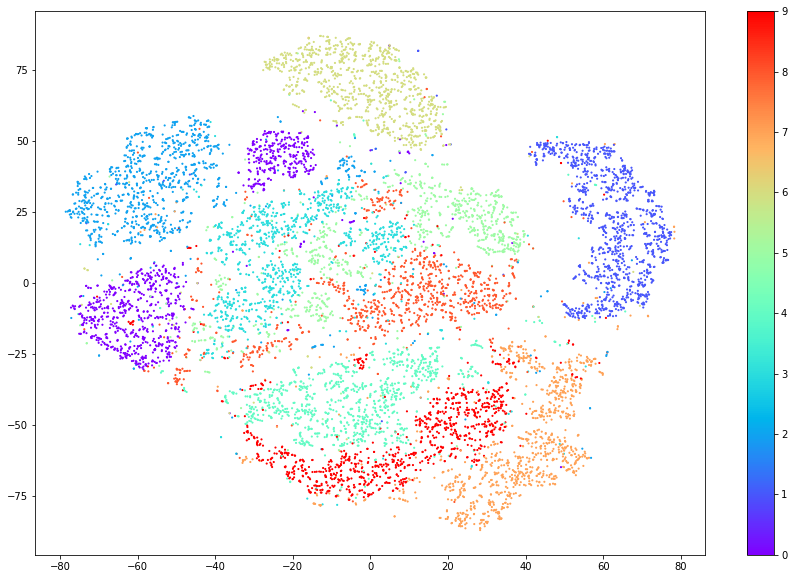

In [81]:
# another run because t-SNE can vary
X = encoder.predict(x_test.reshape(10000,784))
X_tsne = TSNE().fit_transform(X)
plt.figure(figsize=(15,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_test,cmap='rainbow',marker='.',s=5)
plt.colorbar()
plt.show()

### 3D t-SNE

In [16]:
X = encoder.predict(x_test.reshape(10000,784))
X_tsne = TSNE(n_components=3).fit_transform(X)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


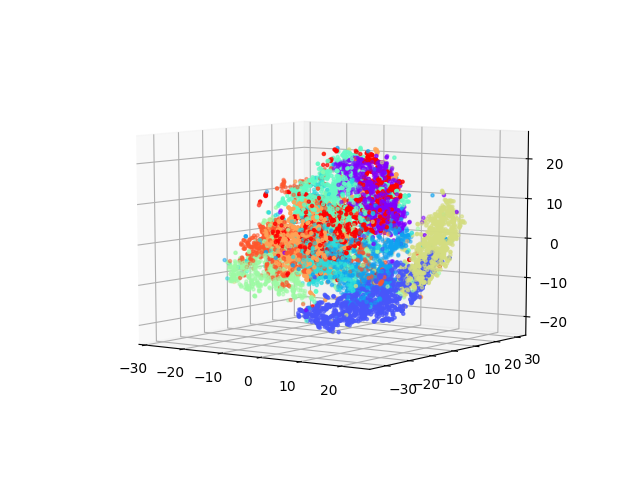

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,2],X_tsne[:,1],X_tsne[:,0],c=y_test,cmap='rainbow',marker='.')
#plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


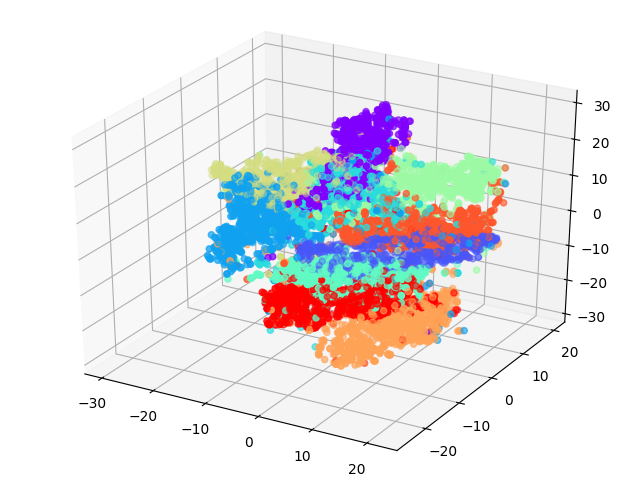

In [146]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_tsne[:,0].T,X_tsne[:,2].T,X_tsne[:,1].T,c=y_test,cmap='rainbow',marker='o')
plt.show()